In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cvzone
import tensorflow as tf

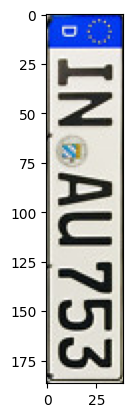

In [10]:
image = cv2.imread("license_plate.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image)

Matrícula detectada: 


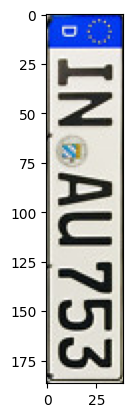

In [11]:
# crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
# gray = cv2.threshold(crop, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# OCR con configuración especial (psm 7 = una línea de texto)
text = pytesseract.image_to_string(image, config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")

print("Matrícula detectada:", text.strip())
plt.imshow(image)

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/datasets_licence_plate/data.yaml epochs=50 imgsz=640 verbose=True amp=True

^C


In [ ]:
model = YOLO("ai_models/license_ai.pt")

In [ ]:
cap = cv2.VideoCapture("cars1.mp4")

while True:
    success, img = cap.read()
    frame = cv2.resize(img, (1366, 768))
    results = model(frame, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2-x1, y2-y1
            cvzone.cornerRect(frame, (x1,y1,w,h), t=3, l=9, rt=5)
    cv2.imshow("Image", frame)
    cv2.waitKey(1)




0: 256x448 2 License_Plates, 91.2ms
Speed: 1.0ms preprocess, 91.2ms inference, 51.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 14.5ms
Speed: 1.0ms preprocess, 14.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 3 License_Plates, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 13.3ms
Speed: 0.0ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 12.2ms
Speed: 1.0ms preprocess, 1

KeyboardInterrupt: 

: 

In [5]:
plt.show()

In [3]:
model = YOLO("yolo11s.pt")
model.train(task="detect", mode="train", data="C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_parking_2/data.yaml", epochs=50, imgsz=640, amp=True, verbose=True)

New https://pypi.org/project/ultralytics/8.3.192 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_parking_2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

train: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\test\labels... 1291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1291/1291 [00:01<00:00, 719.11it/s]


train: New cache created: C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\test\labels.cache


val: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\valid\labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 1837.36it/s]

val: New cache created: C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.78G      1.242      1.196      1.204        134        640: 100%|██████████| 81/81 [00:18<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        106        768      0.937      0.859      0.952       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.03G      1.138     0.7037      1.142        211        640: 100%|██████████| 81/81 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        106        768      0.903       0.87      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.86G      1.067     0.6602      1.109        229        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        106        768       0.88      0.937      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.04G      1.042     0.6097      1.093        136        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        106        768      0.887      0.863      0.919      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.05G      1.018     0.6014      1.086        151        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        106        768      0.931      0.917      0.968      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.2G     0.9555     0.5495      1.054         99        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.952      0.961      0.987       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.18G     0.9411     0.5545      1.051        121        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        106        768      0.963      0.964      0.984      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.89G     0.9163      0.528      1.044        150        640: 100%|██████████| 81/81 [00:15<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        106        768       0.98      0.969      0.991      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.87G     0.8897     0.5027      1.025        230        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        106        768       0.96      0.978       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.68G     0.8797     0.5025      1.021        159        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.976      0.966       0.99      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.84G     0.8715     0.4858      1.021        176        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        106        768      0.975      0.982      0.991       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.82G     0.8608     0.4736      1.021        114        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.957      0.966      0.989      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.99G     0.8391     0.4619      1.006        110        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.978      0.984      0.991       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.38G     0.8292     0.4507     0.9945        114        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        106        768      0.974      0.974       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.88G     0.8182     0.4461     0.9984        218        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        106        768      0.984      0.986      0.992      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.95G     0.8235     0.4501      0.998        102        640: 100%|██████████| 81/81 [00:15<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        106        768      0.987      0.974      0.991      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.87G     0.8077     0.4363     0.9904        152        640: 100%|██████████| 81/81 [00:15<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.984      0.985      0.991      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.27G     0.7773     0.4216     0.9778         86        640: 100%|██████████| 81/81 [00:15<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        106        768      0.982       0.99      0.992      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.96G     0.7796     0.4213     0.9811        108        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        106        768      0.978      0.982      0.991      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.77G     0.7778     0.4195     0.9814        240        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        106        768      0.978      0.984      0.993      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.96G     0.7704      0.414     0.9762        167        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        106        768      0.983      0.987      0.993      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.04G     0.7493     0.4001     0.9686        136        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.989       0.98      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.91G     0.7496      0.396     0.9658        102        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.988      0.978      0.993      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.05G     0.7518     0.3957     0.9664        106        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        106        768       0.99      0.984      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G      0.735     0.3848     0.9592        187        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        106        768      0.986      0.989      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.09G     0.7329     0.3807     0.9556        175        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.991      0.988      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.82G      0.728     0.3849      0.953        124        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.982      0.993      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.65G     0.7182     0.3739     0.9538        119        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.986      0.988      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.87G     0.7157     0.3702     0.9483         95        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.993      0.987      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.05G     0.7124     0.3722     0.9521        194        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.993      0.988      0.993      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.65G     0.7057     0.3692     0.9497        104        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        106        768      0.995      0.992      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.68G      0.703     0.3616     0.9392        127        640: 100%|██████████| 81/81 [00:16<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        106        768      0.992      0.991      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.67G     0.6955      0.354     0.9425        183        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        106        768      0.992      0.988      0.992      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.07G     0.6826     0.3486     0.9334        135        640: 100%|██████████| 81/81 [00:15<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.995       0.99      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.65G     0.6827     0.3507     0.9361        142        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        106        768      0.994       0.99      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.85G      0.678      0.344     0.9365        119        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        106        768      0.991      0.989      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.95G     0.6628     0.3389     0.9297        206        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        106        768      0.989       0.99      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.83G     0.6591     0.3319     0.9254         91        640: 100%|██████████| 81/81 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        106        768      0.992      0.995      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.78G     0.6514     0.3347     0.9283        100        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        106        768       0.99      0.995      0.993      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.42G     0.6486     0.3285     0.9276        133        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        106        768      0.995      0.993      0.993       0.84


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.84G     0.6106     0.2948     0.9109         75        640: 100%|██████████| 81/81 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        106        768      0.996      0.995      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.62G     0.5997      0.286     0.9062        101        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.992      0.996      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.79G      0.587     0.2815     0.8999        108        640: 100%|██████████| 81/81 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        106        768      0.993      0.996      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.85G     0.5757      0.277     0.8933         36        640: 100%|██████████| 81/81 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.995      0.996      0.992      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.86G     0.5762      0.274     0.8903         87        640: 100%|██████████| 81/81 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.996      0.996      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.87G      0.571     0.2725     0.8916         66        640: 100%|██████████| 81/81 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        106        768      0.996      0.997      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.37G     0.5554     0.2649     0.8851         95        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.995      0.996      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.87G     0.5481     0.2571     0.8855        131        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        106        768      0.996      0.996      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.84G     0.5415     0.2546     0.8794        104        640: 100%|██████████| 81/81 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        106        768      0.994      0.996      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.05G     0.5376     0.2539     0.8819         70        640: 100%|██████████| 81/81 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        106        768      0.995      0.997      0.993      0.862



50 epochs completed in 0.246 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 19.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all        106        768      0.995      0.997      0.993      0.862
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F04B27F910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# To export the model as tflite file use collab instead, because there are dependencies that I cannot sort out or do it by yourself